In [37]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('outliers245.csv')


In [39]:
# df = df.drop(columns=['year'])

In [40]:
y = df['results']
X = df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=2)

In [41]:
X_train.cov()

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,year
goals,0.075829,0.041330,0.007363,0.030060,0.019058,0.006898,0.014656,0.017903,0.023632,0.020044,-0.011926,0.008958,0.008160,-0.002895,0.010120,0.032978,-0.575128
xg,0.041330,0.063442,0.021671,0.043579,0.018985,0.008067,0.014532,0.023936,0.027796,0.020987,-0.020996,0.005281,0.006160,0.005589,0.013965,0.044221,-1.408072
crosses,0.007363,0.021671,0.055188,0.039348,0.021349,0.019929,0.008985,0.021003,0.026756,0.026534,-0.015934,0.005194,0.011372,0.004920,0.013825,0.046921,-0.594329
boxtouches,0.030060,0.043579,0.039348,0.071855,0.026708,0.017867,0.014427,0.030180,0.035665,0.028936,-0.026229,0.008544,0.018474,0.007680,0.015951,0.065248,-1.589018
passes,0.019058,0.018985,0.021349,0.026708,0.083469,0.043071,0.027739,0.053677,0.064645,0.064532,-0.008562,0.021276,-0.002731,0.005207,0.021988,0.039260,-0.135170
progpasses,0.006898,0.008067,0.019929,0.017867,0.043071,0.046391,0.006103,0.022663,0.030559,0.034335,-0.002726,0.011106,0.001713,0.007553,0.010097,0.027177,0.490187
takeons,0.014656,0.014532,0.008985,0.014427,0.027739,0.006103,0.070876,0.041402,0.025340,0.027806,-0.002895,0.011802,-0.005040,0.010263,0.019238,0.027231,-0.414212
progruns,0.017903,0.023936,0.021003,0.030180,0.053677,0.022663,0.041402,0.095518,0.049951,0.046180,-0.009374,0.013076,-0.008761,0.005234,0.012229,0.040669,-0.567684
tackles,0.023632,0.027796,0.026756,0.035665,0.064645,0.030559,0.025340,0.049951,0.111434,0.074695,-0.020743,0.016676,0.003213,-0.001423,0.024234,0.047223,-0.231292
interceptions,0.020044,0.020987,0.026534,0.028936,0.064532,0.034335,0.027806,0.046180,0.074695,0.117094,-0.012082,0.019901,0.001719,0.013066,0.028021,0.044880,-0.057138


<AxesSubplot:>

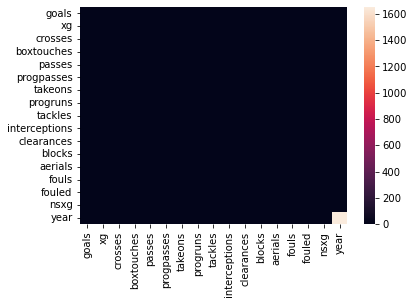

In [42]:
sns.heatmap(X_train.cov())

In [43]:
X_train_prep = X_train

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
X_train_prep.drop('year', axis = 1, inplace = True)
lr2 = LinearRegression()
lr2.fit(X_train_prep, y_train)
y_hat_train = lr2.predict(X_train_prep)
r2_score(y_train, y_hat_train)

0.4551643203157064

In [49]:
from itertools import combinations
columns_list = X_train_prep.columns
interactions = list(combinations(df.columns, 2))

In [50]:
interactions

[('goals', 'xg'),
 ('goals', 'crosses'),
 ('goals', 'boxtouches'),
 ('goals', 'passes'),
 ('goals', 'progpasses'),
 ('goals', 'takeons'),
 ('goals', 'progruns'),
 ('goals', 'tackles'),
 ('goals', 'interceptions'),
 ('goals', 'clearances'),
 ('goals', 'blocks'),
 ('goals', 'aerials'),
 ('goals', 'fouls'),
 ('goals', 'fouled'),
 ('goals', 'nsxg'),
 ('goals', 'results'),
 ('goals', 'year'),
 ('xg', 'crosses'),
 ('xg', 'boxtouches'),
 ('xg', 'passes'),
 ('xg', 'progpasses'),
 ('xg', 'takeons'),
 ('xg', 'progruns'),
 ('xg', 'tackles'),
 ('xg', 'interceptions'),
 ('xg', 'clearances'),
 ('xg', 'blocks'),
 ('xg', 'aerials'),
 ('xg', 'fouls'),
 ('xg', 'fouled'),
 ('xg', 'nsxg'),
 ('xg', 'results'),
 ('xg', 'year'),
 ('crosses', 'boxtouches'),
 ('crosses', 'passes'),
 ('crosses', 'progpasses'),
 ('crosses', 'takeons'),
 ('crosses', 'progruns'),
 ('crosses', 'tackles'),
 ('crosses', 'interceptions'),
 ('crosses', 'clearances'),
 ('crosses', 'blocks'),
 ('crosses', 'aerials'),
 ('crosses', 'fouls'

In [59]:
# interaction_dict = {}
# for interaction in interactions:
#     X_train_int = X_train_prep
#     X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
#     lr3 = LinearRegression()
#     lr3.fit(X_train_int, y_train)
#     interaction_dict[lr3.score(X_train_int, y_train)] = interaction

In [56]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('results', 'year')


In [60]:
# X_train_int = X_train_prep
# X_train_int['res_yr'] = X_train_int['results'] * X_train_int['year']

In [63]:
import time
import os
import pandas as pd # for dataframe operations. 
import numpy as np #for linear algebra operations.
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # for plottingfrom sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import kendalltau # we will compare predicted and real results

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/externals/__init__.py)